    
    #****************************************************************************************************************                                                
                                              
                                                 ## Disclaimer

    o We are Providing this code block strictly for learning and researching, this is not a production ready code. 

    o We have no liability on this Particular Code under any circumstances.

    o The users should use this code on their own risk. All Software, hardware and other products that are referenced 

       in in material belongs to the respective vendor who developed or own this product. 

                                              © DeepSphere.AI, Inc.
                                                 
    #****************************************************************************************************************
    
                    

# STEP- 0 INI FILE CONFIGURATION

In [18]:
import configparser

import os

vAR_Config = configparser.ConfigParser(allow_no_value=True)

vAR_INI_FILE_PATH = os.getenv('PATIENT_READMISSION_INI_FILE')
#print(vAR_INI_FILE_PATH)

vAR_Config.read(vAR_INI_FILE_PATH)

vAR_Data = vAR_Config.sections()

vAR_Config.sections()

vAR_Training_Data = vAR_Config['FILE PATH']['TRAINING_DATA']
#print(vAR_Training_Data)

vAR_Training_Data_Excel_Worsheet = vAR_Config['FILE PATH']['TRAINING_DATA_EXCEL_WORKSHEET']
#print(vAR_Training_Data_Excel_Worsheet)

vAR_Test_Data = vAR_Config['FILE PATH']['TEST_DATA']
#print(vAR_Test_Data)

vAR_Test_Data_Excel_Worsheet = vAR_Config['FILE PATH']['TEST_DATA_EXCEL_WORKSHEET']
#print(vAR_Test_Data_Excel_Worsheet)

vAR_Model_Outcome_XG = vAR_Config['FILE PATH']['MODEL_OUTCOME_XG']
#print(vAR_Model_Outcome_XG)


# STEP- 1 IMPORT THE LIBRARIES

In [20]:
import pandas as vAR_pd

from sklearn.preprocessing import LabelEncoder

import xgboost as vAR_xgb 

from sklearn.model_selection import train_test_split

# STEP- 2 IMPORT THE TRAINING DATA

In [21]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Diabetes_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


# STEP - 3 FEATURE SELECTION

In [22]:
vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df1['Workout'] = vAR_Workout_Conversion

vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Recreational_Drugs']]

vAR_LABEL = vAR_df1['Readmission']


# STEP 4 - IMPORT THE MODEL

In [23]:
import xgboost

vAR_MODEL = xgboost.XGBClassifier()

# STEP 5 - TRAIN THE MODEL 

In [28]:
vAR_X_TRAIN, vAR_X_TEST, vAR_Y_TRAIN, vAR_Y_TEST = train_test_split(vAR_FEATURES, vAR_LABEL, test_size=0.20, random_state=0)

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_X_TRAIN,vAR_Y_TRAIN)

vAR_Score = vAR_MODEL.score(vAR_X_TEST, vAR_Y_TEST)

print(vAR_Score)

0.65


# STEP 6 - IMPORT THE TEST DATA

In [29]:
vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,14])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})



In [30]:
vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df2['Workout'] = vAR_Workout_Conversion

vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Recreational_Drugs']]


# STEP 7 - TEST THE MODEL

In [32]:
vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_TEST

vAR_Score = vAR_MODEL.score(vAR_TEST_FEATURES, vAR_MODEL_TEST)

print(vAR_Score)

1.0


In [34]:
vAR_TEST_DATA.head()

,patient_nbr,Race,Gender,Age,Weight(KG),Education Level (Grade),Occuptation,Maritial Status,Spouse,Hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Choloestrol,Alcohol,Recreational Drugs
0,8222157,Caucasian,Female,57,83,3,Mechanic,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,No,No,No,Low Cholestrol,Social Drinker,Yes
1,55629189,Caucasian,Female,60,99,1,Artist,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,No,Ch,Yes,High Cholestrol,Alcoholic,Yes
2,86047875,AfricanAmerican,Female,51,60,3,Accountant,Married,Yes,XYZ Hospital,...,No,No,No,No,No,No,Yes,High Cholestrol,Non Alcoholic,No
3,82442376,Caucasian,Male,48,83,1,Designer,Married,No,XYZ Hospital,...,No,No,No,No,No,Ch,Yes,Low Cholestrol,Alcoholic,Yes
4,42519267,Caucasian,Male,46,96,1,Mechanic,Unmarried,No,XYZ Hospital,...,No,No,No,No,No,Ch,Yes,Low Cholestrol,Non Alcoholic,Yes


# Step-8 Write the Outcome to a File

In [35]:
vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()

vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome_XG,index=False) 

vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome_XG)

vAR_MODEL_OUTPUT.head()

,patient_nbr,Race,Gender,Age,Weight(KG),Education Level (Grade),Occuptation,Maritial Status,Spouse,Hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Choloestrol,Alcohol,Recreational Drugs,Patient_Readmission_Prediction
0,8222157,Caucasian,Female,57,83,3,Mechanic,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,No,No,Low Cholestrol,Social Drinker,Yes,1
1,55629189,Caucasian,Female,60,99,1,Artist,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,Ch,Yes,High Cholestrol,Alcoholic,Yes,1
2,86047875,AfricanAmerican,Female,51,60,3,Accountant,Married,Yes,XYZ Hospital,...,No,No,No,No,No,Yes,High Cholestrol,Non Alcoholic,No,1
3,82442376,Caucasian,Male,48,83,1,Designer,Married,No,XYZ Hospital,...,No,No,No,No,Ch,Yes,Low Cholestrol,Alcoholic,Yes,1
4,42519267,Caucasian,Male,46,96,1,Mechanic,Unmarried,No,XYZ Hospital,...,No,No,No,No,Ch,Yes,Low Cholestrol,Non Alcoholic,Yes,1


In [12]:
vAR_ANALYSIS = vAR_MODEL_OUTPUT[['Age','Patient_Readmission_Prediction']]

#vAR_ANALYSIS

import matplotlib.pyplot as plt

plt.bar(vAR_MODEL_OUTPUT['Age'], vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'])

<BarContainer object of 99 artists>

([<matplotlib.patches.Wedge at 0x2691f9e4c18>,
 [Text(-0.5894094953465411, -0.928760704807937, 'Readmitted'),
  Text(0.6429921767416813, 1.0131934961541131, 'Non Readmitted')],
 [Text(-0.3214960883708406, -0.5065967480770565, '82.00%'),
  Text(0.37507876976598076, 0.5910295394232326, '18.00%')])

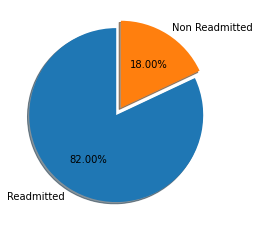

In [13]:
vAR_ANALYSIS1 = vAR_MODEL_OUTPUT[['Race','Patient_Readmission_Prediction']]

#plt.scatter(vAR_MODEL_OUTPUT['Race'],vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'])

#plt.pie(vAR_MODEL_OUTPUT['Race'],vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'])

vAR_MODEL_OUTPUT[vAR_MODEL_OUTPUT['Patient_Readmission_Prediction']==1].count()

vAR_MODEL_OUTPUT[vAR_MODEL_OUTPUT['Patient_Readmission_Prediction']==0].count()

VAR_Plot = [82,18]

vAR_Labels = 'Readmitted','Non Readmitted'

vAR_Explode = (0,0.1)

fig1, ax1 = plt.subplots()

ax1.pie(VAR_Plot, explode=vAR_Explode, labels=vAR_Labels, autopct='%2.2f%%', shadow=True, startangle=90)


In [14]:
vAR_PATIENTS_READMISSION = vAR_MODEL_OUTPUT[vAR_MODEL_OUTPUT['Patient_Readmission_Prediction']==1]

vAR_PATIENTS_READMISSION.head()

,patient_nbr,Race,Gender,Age,Weight(KG),Education Level (Grade),Occuptation,Maritial Status,Spouse,Hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Choloestrol,Alcohol,Recreational Drugs,Patient_Readmission_Prediction
0,8222157,Caucasian,Female,57,83,3,Mechanic,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,No,No,Low Cholestrol,Social Drinker,Yes,1
1,55629189,Caucasian,Female,60,99,1,Artist,Unmarried,Yes,XYZ Hospital,...,No,No,No,No,Ch,Yes,High Cholestrol,Alcoholic,Yes,1
2,86047875,AfricanAmerican,Female,51,60,3,Accountant,Married,Yes,XYZ Hospital,...,No,No,No,No,No,Yes,High Cholestrol,Non Alcoholic,No,1
3,82442376,Caucasian,Male,48,83,1,Designer,Married,No,XYZ Hospital,...,No,No,No,No,Ch,Yes,Low Cholestrol,Alcoholic,Yes,1
4,42519267,Caucasian,Male,46,96,1,Mechanic,Unmarried,No,XYZ Hospital,...,No,No,No,No,Ch,Yes,Low Cholestrol,Non Alcoholic,Yes,1


In [15]:

vAR_PATIENTS_READMISSION_BY_RACE = vAR_PATIENTS_READMISSION[vAR_PATIENTS_READMISSION['Race']=='Caucasian'].count()

vAR_PATIENTS_READMISSION_BY_AGE = vAR_PATIENTS_READMISSION['Age'].count()

vAR_PATIENTS_READMISSION_BY_OCCUPATION = vAR_PATIENTS_READMISSION[vAR_PATIENTS_READMISSION['Occuptation']=='Homemaker'].count()


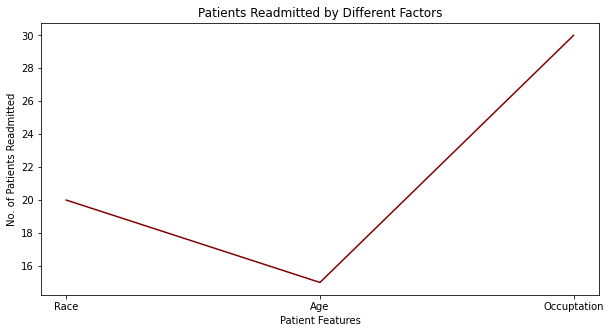

In [16]:
import matplotlib.pyplot as plt  
   
vAR_data = {'Race':20, 'Age':15, 'Occuptation':30} 

vAR_courses = list(vAR_data.keys()) 

vAR_values = list(vAR_data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
 
# creating the bar plot 

plt.plot(vAR_courses, vAR_values, color ='maroon') 
  
plt.xlabel("Patient Features") 

plt.ylabel("No. of Patients Readmitted") 

plt.title("Patients Readmitted by Different Factors") 

plt.show() 

# Influencing Factors - Travel History, Smoking Habits, Workout, Blood Pressure, Diabetes, Recreational Drugs

In [17]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df1['Workout'] = vAR_Workout_Conversion

vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Recreational_Drugs']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})

vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df2['Workout'] = vAR_Workout_Conversion

vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Recreational_Drugs']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission1', 'Probability of Readmission1'])

vAR_MODEL_READMISSION_PROBABILITY1 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY1.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


NameError: name 'LogisticRegression' is not defined

# Influencing Factors - Travel History, Smoking Habits, Workout, Blood Pressure, Diabetes 

In [ ]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df1['Workout'] = vAR_Workout_Conversion

vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df2['Workout'] = vAR_Workout_Conversion

vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission2', 'Probability of Readmission2'])

vAR_MODEL_READMISSION_PROBABILITY2 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY2.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


# Influencing Factors - Travel History, Smoking Habits, Workout, Blood Pressure 

In [ ]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df1['Workout'] = vAR_Workout_Conversion

vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits','Workout','Blood_Pressure']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df2['Workout'] = vAR_Workout_Conversion

vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits','Workout','Blood_Pressure']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission3', 'Probability of Readmission3'])

vAR_MODEL_READMISSION_PROBABILITY3 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY3.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


# Influencing Factors - Travel History, Smoking Habits, Workout 

In [ ]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df1['Workout'] = vAR_Workout_Conversion

#vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits','Workout']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

vAR_df2['Workout'] = vAR_Workout_Conversion

#vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits','Workout']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission4', 'Probability of Readmission4'])

vAR_MODEL_READMISSION_PROBABILITY4 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY4.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


# Influencing Factors - Travel History, Smoking Habits

In [ ]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,14])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

#vAR_df1['Workout'] = vAR_Workout_Conversion

#vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History','Smoking_Habits']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

#vAR_df2['Workout'] = vAR_Workout_Conversion

#vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History','Smoking_Habits']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission5', 'Probability of Readmission5'])

vAR_MODEL_READMISSION_PROBABILITY5 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY5.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


# Influencing Factor - Travel History

In [ ]:
vAR_INPUT_DATA = vAR_pd.read_excel(vAR_Training_Data)

vAR_INPUT_DATA.head()

vAR_TRAINING_DATA = vAR_INPUT_DATA

vAR_TRAINING_DATA


vAR_le = LabelEncoder()

vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


Cholestrol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,53])

Cholestrol_Conversion_df = vAR_pd.DataFrame(Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_Readmission_Conversion = vAR_le.fit_transform(vAR_TRAINING_DATA.iloc[:,56])

vAR_Readmission_Conversion_df = vAR_pd.DataFrame(vAR_Readmission_Conversion,columns={'Readmission_Converted'})


vAR_df1 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Recreational_Drugs','Readmission'])

vAR_df1['Travel_History'] = vAR_Travel_History_Conversion

#vAR_df1['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

#vAR_df1['Workout'] = vAR_Workout_Conversion

#vAR_df1['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df1['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df1['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df1['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion

vAR_df1['Readmission'] = vAR_Readmission_Conversion


vAR_FEATURES = vAR_df1[['Travel_History']]

vAR_LABEL = vAR_df1['Readmission']


vAR_MODEL = LogisticRegression()

vAR_MODEL_TRAINING = vAR_MODEL.fit(vAR_FEATURES,vAR_LABEL)


vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_le = LabelEncoder()


vAR_Travel_History_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,15])

vAR_Travel_History_Conversion_df = vAR_pd.DataFrame(vAR_Travel_History_Conversion,columns={'Travel_History_Converted'})


vAR_Smoking_Habits_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,16])

vAR_Smoking_Habits_Conversion_df = vAR_pd.DataFrame(vAR_Smoking_Habits_Conversion,columns={'Smoking_Habits_Converted'})


vAR_Workout_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,17])

vAR_Workout_Conversion_df = vAR_pd.DataFrame(vAR_Workout_Conversion,columns={'Workout_Converted'})


vAR_Blood_Pressure_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,18])

vAR_Blood_Pressure_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Blood_Pressure_Converted'})


vAR_Diabetes_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,19])

vAR_Diabetes_Conversion_df = vAR_pd.DataFrame(vAR_Blood_Pressure_Conversion,columns={'Diabetes_Converted'})


vAR_Cholestrol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,53])

vAR_Cholestrol_Conversion_df = vAR_pd.DataFrame(vAR_Cholestrol_Conversion,columns={'Cholestrol_Converted'})


vAR_Alcohol_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,54])

vAR_Alcohol_Conversion_df = vAR_pd.DataFrame(vAR_Alcohol_Conversion,columns={'Alcohol_Converted'})


vAR_Recreational_Drugs_Conversion = vAR_le.fit_transform(vAR_TEST_DATA.iloc[:,55])

vAR_Recreational_Drugs_Conversion_df = vAR_pd.DataFrame(vAR_Recreational_Drugs_Conversion,columns={'Recreational_Drugs_Converted'})


vAR_df2 = vAR_pd.DataFrame(columns=['Travel_History','Smoking_Habits','Workout','Blood_Pressure','Diabetes','Cholestrol','Readmission'])

vAR_df2['Travel_History'] = vAR_Travel_History_Conversion

#vAR_df2['Smoking_Habits'] = vAR_Smoking_Habits_Conversion

#vAR_df2['Workout'] = vAR_Workout_Conversion

#vAR_df2['Blood_Pressure'] = vAR_Blood_Pressure_Conversion

#vAR_df2['Diabetes'] = vAR_Diabetes_Conversion

#vAR_df2['Cholestrol'] = vAR_Cholestrol_Conversion

#vAR_df2['Recreational_Drugs'] = vAR_Recreational_Drugs_Conversion


vAR_TEST_FEATURES = vAR_df2[['Travel_History']]

vAR_MODEL_TEST = vAR_MODEL.predict(vAR_TEST_FEATURES)

vAR_MODEL_OUTPUT = vAR_TEST_DATA

vAR_MODEL_OUTPUT['Patient_Readmission_Prediction'] = vAR_MODEL_TEST

vAR_MODEL_OUTPUT.head()


vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_MODEL.predict_proba(vAR_TEST_FEATURES)

vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES = vAR_pd.DataFrame(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,
                                                                       columns=['Probability of Non Readmission6', 'Probability of Readmission6'])

vAR_MODEL_READMISSION_PROBABILITY6 =  vAR_MODEL_OUTPUT.merge(vAR_MODEL_PREDICTION_RESULTS_PROBABILITY_ALL_FEATURES,left_index=True,right_index=True)

vAR_MODEL_READMISSION_PROBABILITY6.head()


#vAR_MODEL_OUTPUT.to_excel(vAR_Model_Outcome,index=False) 

#vAR_MODEL_OUTPUT = vAR_pd.read_excel(vAR_Model_Outcome)

#vAR_MODEL_OUTPUT.head()


In [ ]:
vAR_MODEL_READMISSION_PROBABILITY1 = vAR_MODEL_READMISSION_PROBABILITY1

vAR_MODEL_READMISSION_PROBABILITY2 = vAR_MODEL_READMISSION_PROBABILITY2[['patient_nbr','Probability of Non Readmission2','Probability of Readmission2']]

vAR_MODEL_READMISSION_PROBABILITY3 = vAR_MODEL_READMISSION_PROBABILITY3[['patient_nbr','Probability of Non Readmission3','Probability of Readmission3']]

vAR_MODEL_READMISSION_PROBABILITY4 = vAR_MODEL_READMISSION_PROBABILITY4[['patient_nbr','Probability of Non Readmission4','Probability of Readmission4']]

vAR_MODEL_READMISSION_PROBABILITY5 = vAR_MODEL_READMISSION_PROBABILITY5[['patient_nbr','Probability of Non Readmission5','Probability of Readmission5']]

vAR_MODEL_READMISSION_PROBABILITY6 = vAR_MODEL_READMISSION_PROBABILITY6[['patient_nbr','Probability of Non Readmission6','Probability of Readmission6']]


# Merge All the Influencing Factor Probabilities

In [ ]:
vAR_MODEL_READMISSION_123451234 = vAR_MODEL_READMISSION_PROBABILITY1.merge(vAR_MODEL_READMISSION_PROBABILITY2,left_index=True,right_index=True)
                               
vAR_MODEL_READMISSION_12345123 = vAR_MODEL_READMISSION_123451234.merge(vAR_MODEL_READMISSION_PROBABILITY3,left_index=True,right_index=True)

vAR_MODEL_READMISSION_1234512 = vAR_MODEL_READMISSION_12345123.merge(vAR_MODEL_READMISSION_PROBABILITY4,left_index=True,right_index=True)

vAR_MODEL_READMISSION_123451 = vAR_MODEL_READMISSION_1234512.merge(vAR_MODEL_READMISSION_PROBABILITY5,left_index=True,right_index=True)

vAR_MODEL_READMISSION_12345 = vAR_MODEL_READMISSION_123451.merge(vAR_MODEL_READMISSION_PROBABILITY6,left_index=True,right_index=True)

#vAR_MODEL_READMISSION_12345.head()

In [ ]:
vAR_MODEL_READMISSION_INFLUENCING_FACTORS = vAR_MODEL_READMISSION_12345[['patient_nbr_x', 'Race', 'Gender', 'Age', 'Weight(KG)','Education Level (Grade)', 'Occuptation', 'Maritial Status', 'Spouse','Hospital', 'time_in_hospital', 'medical_specialty','num_lab_procedures', 'num_procedures', 'num_medications','Travel History', 'Smoking Habits', 'Sleeping History (Hours in a Day)','Walking Activity (No of Steps a Days)', 'Workout', 'Blood Pressure','Diabetes', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton','insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed', 'Choloestrol','Alcohol', 'Recreational Drugs', 'Patient_Readmission_Prediction','Probability of Non Readmission1', 'Probability of Readmission1', 'Probability of Non Readmission2','Probability of Readmission2','Probability of Non Readmission3', 'Probability of Readmission3','Probability of Non Readmission4','Probability of Readmission4','Probability of Non Readmission5', 'Probability of Readmission5','Probability of Non Readmission6','Probability of Readmission6']]

vAR_MODEL_READMISSION_INFLUENCING_FACTORS.head()

In [ ]:
# Influencing Factors - Travel History, Smoking Habits, Workout, Blood Pressure, Diabetes, Recreational Drugs

In [ ]:
# Probability Calculation for Feature - Quantity (X1)

#X1+X2+X3+X4+X5+X6 = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1']

#X2+X3+X4+X5+X6 = vAR_MODEL_READMISSION_PROBABILITY2['Probability of Readmission2']

#X3+X4+X5+X6 = vAR_MODEL_READMISSION_PROBABILITY3['Probability of Readmission3']

#X4+X5+X6 = vAR_MODEL_READMISSION_PROBABILITY4['Probability of Readmission4']

#X5+X6 = vAR_MODEL_READMISSION_PROBABILITY5['Probability of Readmission5']

#X6 = vAR_MODEL_READMISSION_PROBABILITY6['Probability of Readmission6']


vAR_MODEL_READMISSION_12345['Weightage of Drugs'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1'] - vAR_MODEL_READMISSION_PROBABILITY2['Probability of Readmission2']

vAR_MODEL_READMISSION_12345['Weightage of Diabetes'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1'] - vAR_MODEL_READMISSION_PROBABILITY3['Probability of Readmission3']

vAR_MODEL_READMISSION_12345['Weightage of BP'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1'] - vAR_MODEL_READMISSION_PROBABILITY4['Probability of Readmission4']

vAR_MODEL_READMISSION_12345['Weightage of Workout'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1'] - vAR_MODEL_READMISSION_PROBABILITY5['Probability of Readmission5']

vAR_MODEL_READMISSION_12345['Weightage of Smoking'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1'] - vAR_MODEL_READMISSION_PROBABILITY6['Probability of Readmission6']

vAR_MODEL_READMISSION_12345['Weightage of Travelling'] = vAR_MODEL_READMISSION_PROBABILITY1['Probability of Readmission1']


In [ ]:
vAR_MODEL_READMISSION_12345.head()

In [ ]:
vAR_MODEL_READMISSION_IF = vAR_MODEL_READMISSION_12345[['patient_nbr_x', 'Race', 'Gender', 'Age', 'Weight(KG)','Education Level (Grade)', 'Occuptation', 'Maritial Status', 'Spouse','Hospital', 'time_in_hospital', 'medical_specialty','num_lab_procedures', 'num_procedures', 'num_medications','Travel History', 'Smoking Habits', 'Sleeping History (Hours in a Day)','Walking Activity (No of Steps a Days)', 'Workout', 'Blood Pressure','Diabetes', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton','insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed', 'Choloestrol','Alcohol', 'Recreational Drugs', 'Patient_Readmission_Prediction','Weightage of Drugs','Weightage of Diabetes','Weightage of BP','Weightage of Workout','Weightage of Smoking','Weightage of Travelling']]

vAR_MODEL_READMISSION_IF.head()

vAR_MODEL_READMISSION_IF = vAR_MODEL_READMISSION_IF.to_excel('C:/AI/Patient Readmission/ML/MODEL OUTCOME/Patient_Readmission_IF.xlsx',index=False)

vAR_MODEL_READMISSION_IF = vAR_pd.read_excel('C:/AI/Patient Readmission/ML/MODEL OUTCOME/Patient_Readmission_IF.xlsx')

vAR_MODEL_READMISSION_IF.head()

                                        © DeepSphere.AI, Inc.